In [1]:
!pip install plaid

In [2]:
!pip install plaid-python

In [109]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [59]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Generate Plaid access token to access the Developer Sandbox
* Create keys.sh file in the same folder with Plaid keys
* Use ". keys.sh" command in Bash and see echo messages, e.g. "keys created" printed
* Type in Jupyter Lab in Bash to launch it so as to get into the environments

In [60]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')
PLAID_SBX_SECRET_KEY = os.getenv("PLAID_SBX_SECRET_KEY")

In [61]:
type(PLAID_SBX_SECRET_KEY)

str

In [62]:
from plaid import Client

### 1. Create a client to connect to plaid

In [63]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox') 

In [64]:
INSTITUTION_ID = "ins_109508"

In [65]:
# api-key = 'tjhwakjgfhkasjdhfsajdflsj$$$'
# api_request = 'https://www.plaid.com/api/'
import datetime

### 2. Generate a public token

In [66]:
# Create public token to be exchanged for institution access token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [67]:
# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Store access token as variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [68]:
# Get accounts associated with institution
accounts_response = client.Accounts.get(access_token)
pretty_print_response(accounts_response)

{
    "accounts": [
        {
            "account_id": "L67KPKz4jVuB6koprox6FkwMLpgW5rHPnl6y1",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "pZ8KAKdPL5FAmKaBwaomcxPz4dLoWpiLMElNa",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [69]:
# Extract Transactions with date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 
transactions_response = client.Transactions.get(access_token, start_date, end_date)

### 2. Print the categories for each transaction

In [70]:
transaction = transactions_response['transactions']

In [71]:
for spending in transaction:
    print(spending['category'])

['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Avi

In [72]:
# Print the first category for each spending activity
for spending in transaction:
    print(spending['category'][0])

Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel
Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel
Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel


### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [73]:
# Create a dataframe for spending categories by date, with names of vendors and amounts.
spending_df = pd.DataFrame(columns=['Date','Category','Venue','Amount'])
for index, spending in enumerate(transaction):
    spending_df.loc[index] = [spending['date'], spending['category'][0], spending['name'], spending['amount']]
spending_df.head()

,Date,Category,Venue,Amount
0,2020-01-26,Food and Drink,Tectra Inc,500
1,2020-01-25,Payment,AUTOMATIC PAYMENT - THANK,2078.5
2,2020-01-25,Food and Drink,KFC,500
3,2020-01-25,Shops,Madison Bicycle Shop,500
4,2020-01-16,Payment,CREDIT CARD 3333 PAYMENT *//,25


In [74]:
spending_df.dtypes

Date        object
Category    object
Venue       object
Amount      object
dtype: object

### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [75]:
spending_df['Amount'] = spending_df['Amount'].astype('float')

---

In [76]:
# Convert data types for spending analysis and set date as the index
spending_df['Date'] = pd.to_datetime(spending_df['Date'])
spending_df.set_index('Date', inplace=True)
spending_df.sort_index(ascending=True, inplace=True)

In [77]:
spending_df

,Category,Venue,Amount
Date,,,
2019-10-31,Travel,Uber,6.33
2019-11-02,Travel,United Airlines,500.00
2019-11-12,Transfer,INTRST PYMNT,-4.22
2019-11-13,Food and Drink,SparkFun,89.40
2019-11-14,Food and Drink,Starbucks,4.33
2019-11-14,Food and Drink,McDonald's,12.00
2019-11-15,Travel,United Airlines,-500.00
2019-11-15,Recreation,Touchstone Climbing,78.50
2019-11-16,Transfer,CD DEPOSIT .INITIAL.,1000.00


In [78]:
spending_df.dtypes

Category     object
Venue        object
Amount      float64
dtype: object

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

## d. Use the API to fetch income data from the sandbox and print the following:

### i. Last Year's Income Before Tax

In [79]:
# i. Last year's income before tax
income_response = client.Income.get(access_token)
pretty_print_response(income_response['income'])

{
    "income_streams": [
        {
            "confidence": 0.99,
            "days": 690,
            "monthly_income": 500,
            "name": "UNITED AIRLINES"
        }
    ],
    "last_year_income": 6000,
    "last_year_income_before_tax": 7285,
    "max_number_of_overlapping_income_streams": 1,
    "number_of_income_streams": 1,
    "projected_yearly_income": 6085,
    "projected_yearly_income_before_tax": 7389
}


In [80]:
# Fetch "last_year_income_before_tax" from JSON library printed above
gross_income_last_year = income_response['income']['last_year_income_before_tax']
print(f"i. Previous year's income before tax was ${gross_income_last_year}.")

i. Previous year's income before tax was $7285.


### ii. Current Monthly Income

In [81]:
# Use index 0 for the first entry in "income_streams" for "monthly_income" in the current year
current_monthly_income = income_response['income']['income_streams'][0]['monthly_income']
print(f"ii. Current year's monthly income is ${current_monthly_income}.")

ii. Current year's monthly income is $500.


### iii. Projected Year's Income Before Tax

In [113]:
import math
yearly_inflation_rate = 0.02
monthly_inflation_rate = (1 + yearly_inflation_rate) ** (1/12) - 1
print(f"Based on 2% projected inflation rate, the monthly inflation rate is {monthly_inflation_rate}.")

Based on 2% projected inflation rate, the monthly inflation rate is 0.0016515813019202241.


In [114]:
projected_yearly_income = current_monthly_income*((1- (1+monthly_inflation_rate)**12)/(1-(1+monthly_inflation_rate)))
print(f"iii. Based on 2% projected inflation rate, the yearly income at the end of present year is ${projected_yearly_income:,.2f}.")

iii. Based on 2% projected inflation rate, the yearly income at the end of present year is $6,054.80.


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

### a. Get to know the data

In [115]:
category_df = spending_df.groupby(['Category']).sum()
category_df

,Amount
Category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


In [116]:
category_df['Amount']

Category
Food and Drink     3317.19
Payment            6310.50
Recreation          235.50
Shops              1500.00
Transfer          20537.34
Travel               35.19
Name: Amount, dtype: float64

In [117]:
spending_df[spending_df['Category'] == 'Transfer']['Amount'].sum()

20537.34

In [118]:
percent = category_df['Amount']/(category_df['Amount'].sum())
percent
# Question: why are the percentages calculated different from those in the pie chart from plotly?

Category
Food and Drink    0.103871
Payment           0.197600
Recreation        0.007374
Shops             0.046969
Transfer          0.643084
Travel            0.001102
Name: Amount, dtype: float64

In [119]:
Category_df = pd.concat([category_df, percent], axis=1)
Category_df.columns = ["Amount", "Percent"]
Category_df

,Amount,Percent
Category,,
Food and Drink,3317.19,0.103871
Payment,6310.50,0.197600
Recreation,235.50,0.007374
Shops,1500.00,0.046969
Transfer,20537.34,0.643084
Travel,35.19,0.001102


## b. Create a pie chart for spending by categories

array([<matplotlib.axes._subplots.AxesSubplot object at 0x118594690>],
      dtype=object)

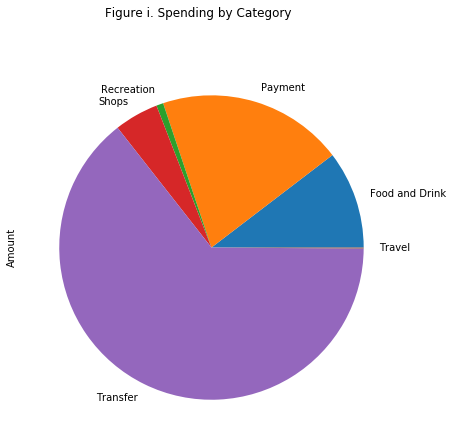

In [135]:
Category_df['Amount'].plot.pie(subplots=True, title='Figure i. Spending by Category', figsize=(15,7))

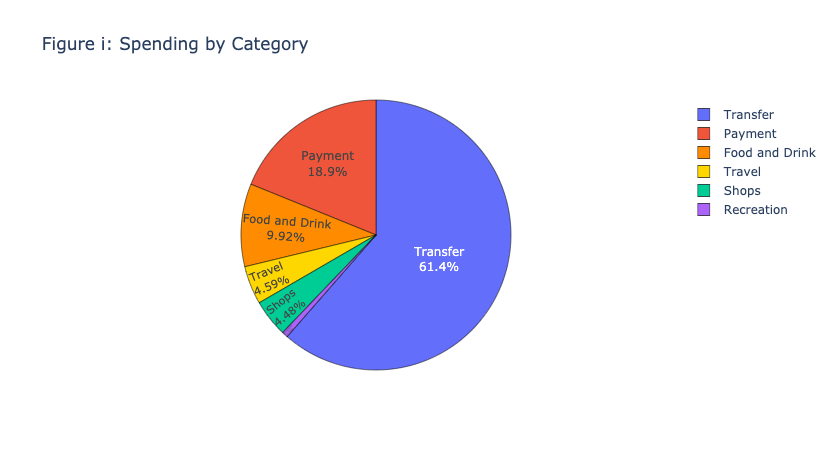

In [136]:
import plotly.express as px
colors = ['gold','turquoise', 'pink', 'darkorange', 'lightgreen', 'purple']
ax_pie = px.data.tips()
fig_pie = px.pie(spending_df, values='Amount', 
                 names='Category', title='Figure i: Spending by Category')
fig_pie.update_traces(textposition='inside', textinfo='percent+label', 
                      marker=dict(colors=colors, line=dict(color='#000000', width=0.5)))
fig_pie.show()

### Create a barchart for spending by categories

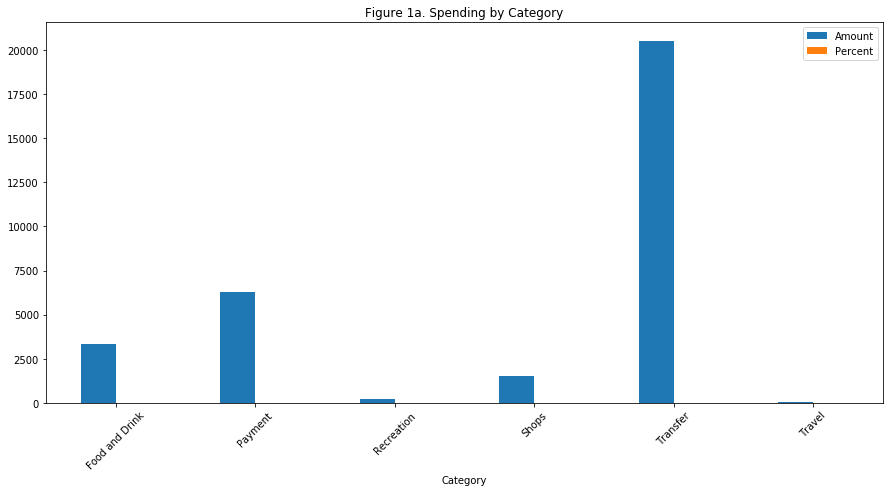

In [94]:
Category_df.plot(kind='bar', rot=45, title='Figure 1a. Spending by Category', figsize=(15,7))

### Calculate the expenses per month

## c. Create a bar chart for monthly expenses

In [95]:
monthly_df = spending_df.groupby(spending_df.index.month).sum()
monthly_df.sort_index(inplace=True)
monthly_df.index.names = ['Month']
monthly_df

,Amount
Month,
1,10638.91
10,6.33
11,10645.24
12,10645.24


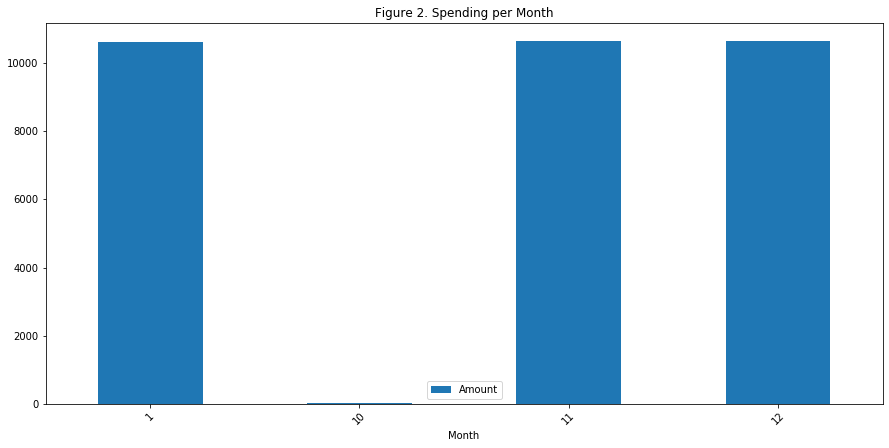

In [97]:
monthly_df.plot(kind='bar', rot=45, title='Figure 2. Spending per Month', figsize=(15,7))

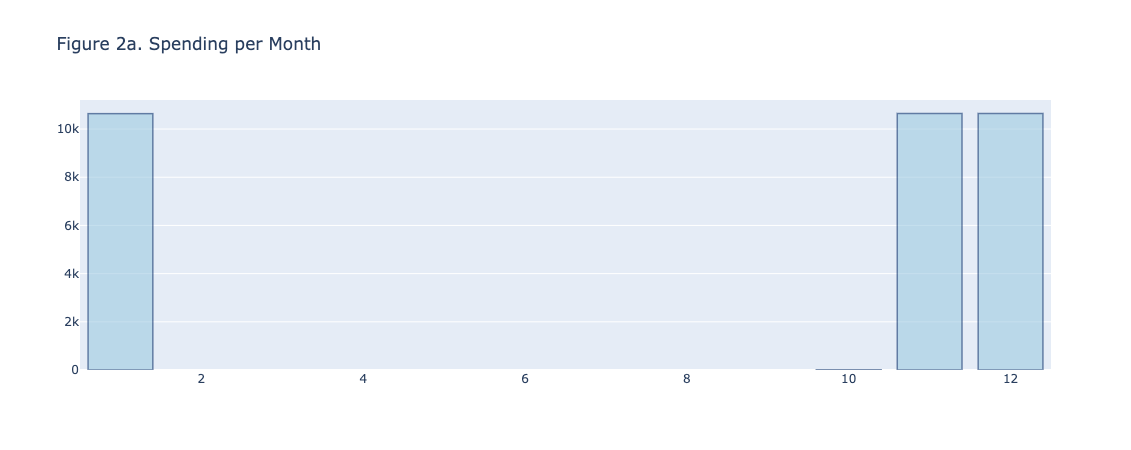

In [98]:
# Alternatively, use plotly for a bar chart with more details in interactive labeling
import plotly.graph_objects as go

fig_bar = go.Figure(data=[
    go.Bar(x=monthly_df.index, y=monthly_df['Amount']),
])
# Change the bar mode
fig_bar.update_layout(barmode='group')

# Use the hovertext kw argument for hover text
fig_bar = go.Figure(data=[go.Bar(x=monthly_df.index, y=monthly_df['Amount'],
            hovertext=['January Spending', 'October Spending', 'November Spending', 'December Spending'])])
# Customize aspect
fig_bar.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig_bar.update_layout(title_text='Figure 2a. Spending per Month')

fig_bar.show()

## References:

Account Summary:
* UC Bootcamp Gitlab Repository
* https://plot.ly/python/pie-charts/
* https://github.com/willwillis/python-api-homework/blob/master/account_summary.ipynb
* https://stackoverflow.com/questions/19851005/rename-pandas-dataframe-index
